In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')

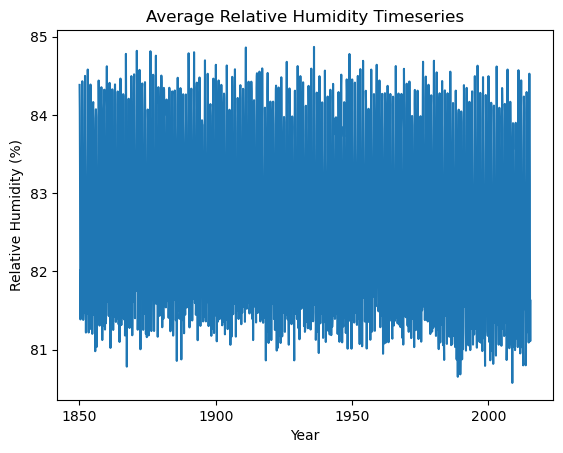

In [6]:
files = glob.glob(f"/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-GHG/r1i1p1f1/Amon/hurs/gn/latest/*.nc")
hurs = xr.open_mfdataset(files)
hurs_timeseries = hurs.mean(['lat', 'lon'])
plt.figure()
hurs_timeseries['hurs'].plot()
plt.title('Average Relative Humidity Timeseries')
plt.ylabel('Relative Humidity (%)')
plt.xlabel('Year');

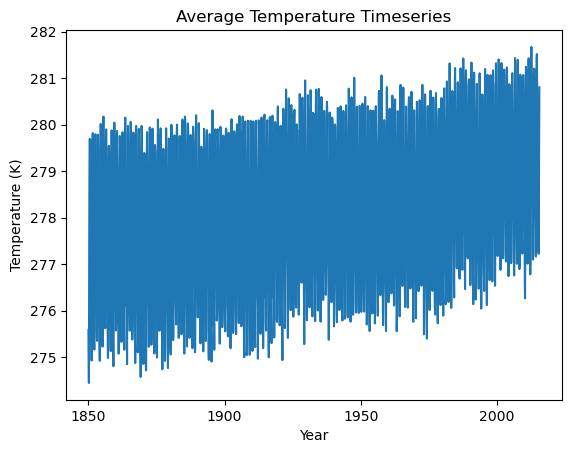

In [8]:
files1 = glob.glob(f"/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-GHG/r1i1p1f1/Amon/tas/gn/latest/*.nc")
tas = xr.open_mfdataset(files1)
tas_timeseries = tas.mean(['lat', 'lon'])
plt.figure()
tas_timeseries['tas'].plot()
plt.title('Average Temperature Timeseries')
plt.ylabel('Temperature (K)')
plt.xlabel('Year');

In [11]:
def ClausiusClapeyron(tas_data):
    numerator = 17.76*(tas_data['tas']-273.15)
    denominator = tas_data['tas'] - 273.15 + 243.5
    svp = .6112 * np.exp(numerator/denominator)
    return svp

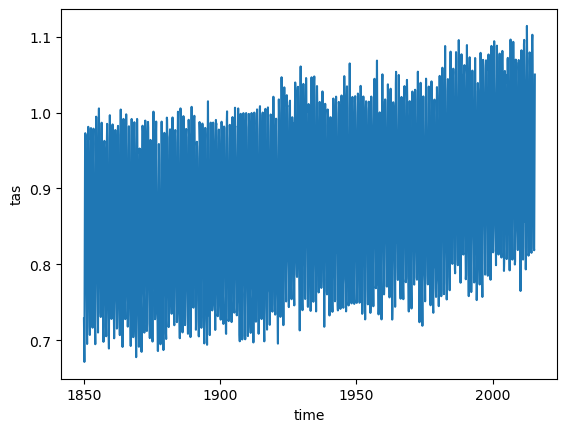

In [12]:
svp1 = ClausiusClapeyron(tas_timeseries)
svp1.plot()

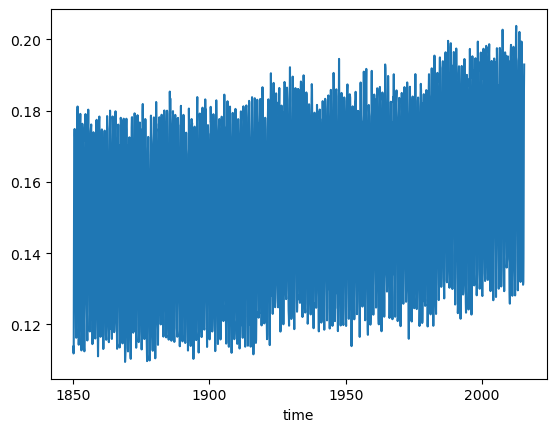

In [13]:
vpd1 = (1 - hurs_timeseries['hurs']/100) * svp1
vpd1.plot()

In [7]:
tas['time'].max()

<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2015, 6, 15, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

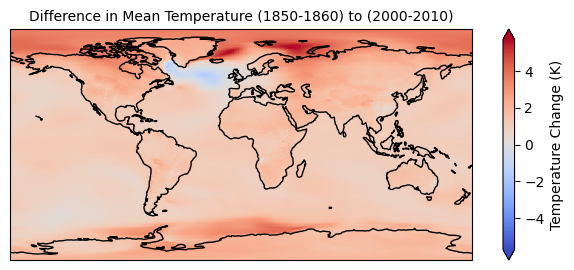

In [23]:
tas_1850 = tas['tas'].sel(time=slice('1850','1860')).mean('time')
tas_2000 = tas['tas'].sel(time=slice('2000','2010')).mean('time')
tas_diff = tas_2000 - tas_1850
plt.figure(figsize=(8,3))
tas_diff.plot(transform=ccrs.PlateCarree(),subplot_kws={"projection": ccrs.PlateCarree()},cmap='coolwarm',cbar_kwargs={"label":"Temperature Change (K)",'extend':'both'})
plt.gca().coastlines()
#plt.setp(plt.gca(),title='Difference in Mean Temperature Between (1850-1860) and (2000-2010)',fontsize=12)
plt.title('Difference in Mean Temperature (1850-1860) to (2000-2010)',fontsize=10);
plt.savefig('tasDiff.png')

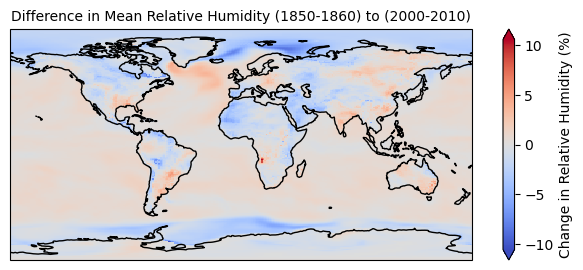

In [22]:
hurs_1850 = hurs['hurs'].sel(time=slice('1850','1860')).mean('time')
hurs_2000 = hurs['hurs'].sel(time=slice('2000','2010')).mean('time')
hurs_diff = hurs_2000 - hurs_1850
plt.figure(figsize=(8,3))
hurs_diff.plot(transform=ccrs.PlateCarree(),subplot_kws={"projection": ccrs.PlateCarree()},cmap='coolwarm',cbar_kwargs={"label":"Change in Relative Humidity (%)",'extend':'both'})
plt.gca().coastlines()
plt.title('Difference in Mean Relative Humidity (1850-1860) to (2000-2010)',fontsize=10);
plt.savefig('hursDiff.png')

In [10]:
hurs

<xarray.Dataset>
Dimensions:    (time: 1986, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2015-06-15 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hurs       (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, nbnd) float64 dask.array<chunksize=(600, 192, 2), meta=np.ndarray>
    lon_bnds   (time, lon, nbnd) float64 dask.array<chunksize=(600, 288, 2), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DAMIP
    branch_time_in_child:   674885.0
    case_id:                1545
    cesm_casename:          b.e21.B1850cmip6.f09_g17.DAMIP-hist-ghg.001
    contact:                cesm_cmip6@ucar.edu
    ...                     ...
    variant_label:          r1i1p1f1
    parent_variant_label:   r1i1p1f1
    parent_experiment_id:   piControl
    parent_activity_id:     CMIP
    branch_time_in_parent:  306600.0
    branch_method:          standard

In [18]:
svp = ClausiusClapeyron(tas)
vpd = ((1-hurs['hurs']/100) * svp)    # /1000 converts to kPa

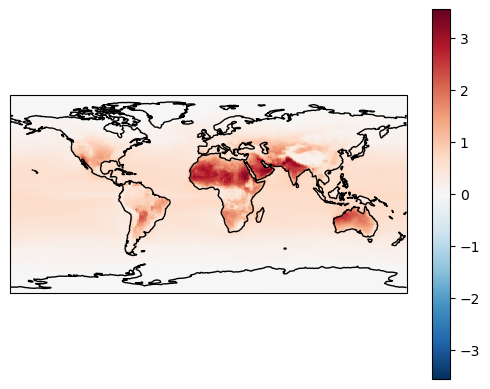

In [19]:
df_1850 = vpd.sel(time=slice('1850','1860')).mean('time')
df_1850.plot(transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree()}
                                          )
plt.gca().coastlines()

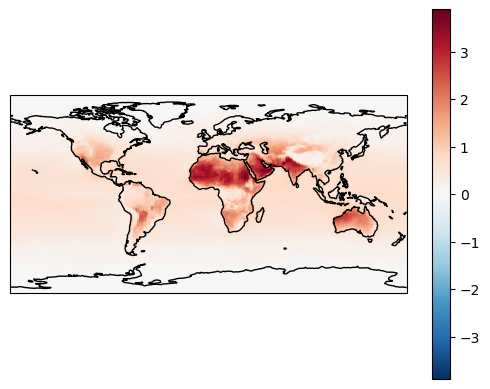

In [20]:
df_2000 = vpd.sel(time=slice('2000','2010')).mean('time')
df_2000.plot(transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree()}
                                          )
plt.gca().coastlines()

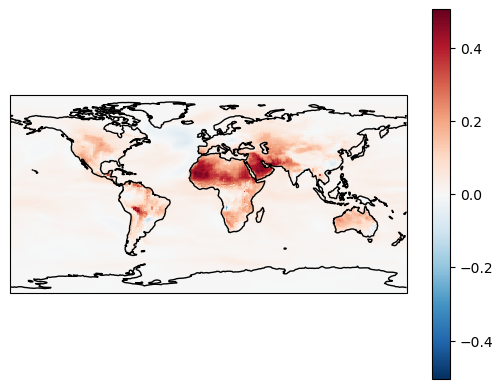

In [21]:
diff_df = df_2000 - df_1850
diff_df.plot(transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree()}
                                          )
plt.gca().coastlines()